# ============================================
# ANÁLISIS ESTADÍSTICO DESCRIPTIVO - VENTAS
# ============================================

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración visual
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('pastel')


### **Cargar el dataset**

In [3]:
ventas = pd.read_csv('../Base_de_datos_limpia/Ventas_limpio.csv')

### **Inspección general**

In [4]:
print("Primeras filas del dataset:")
display(ventas.head())

print("\nInformación general:")
print(ventas.info())

Primeras filas del dataset:


,id_venta,fecha,id_cliente,año_venta,mes_venta,pago_Efectivo,pago_Qr,pago_Tarjeta,pago_Transferencia
0,1,2024-06-19,62,2024,6,0,0,1,0
1,2,2024-03-17,49,2024,3,0,1,0,0
2,3,2024-01-13,20,2024,1,0,0,1,0
3,4,2024-02-27,36,2024,2,0,0,0,1
4,5,2024-06-11,56,2024,6,0,0,1,0



Información general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id_venta            120 non-null    int64 
 1   fecha               120 non-null    object
 2   id_cliente          120 non-null    int64 
 3   año_venta           120 non-null    int64 
 4   mes_venta           120 non-null    int64 
 5   pago_Efectivo       120 non-null    int64 
 6   pago_Qr             120 non-null    int64 
 7   pago_Tarjeta        120 non-null    int64 
 8   pago_Transferencia  120 non-null    int64 
dtypes: int64(8), object(1)
memory usage: 8.6+ KB
None


### **Análisis de variables temporales**

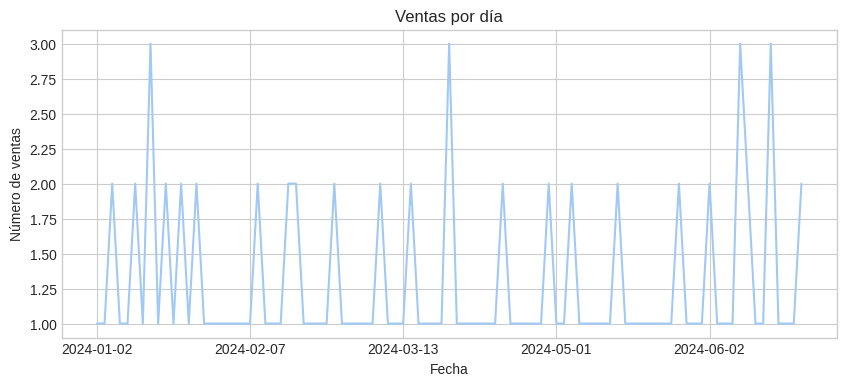

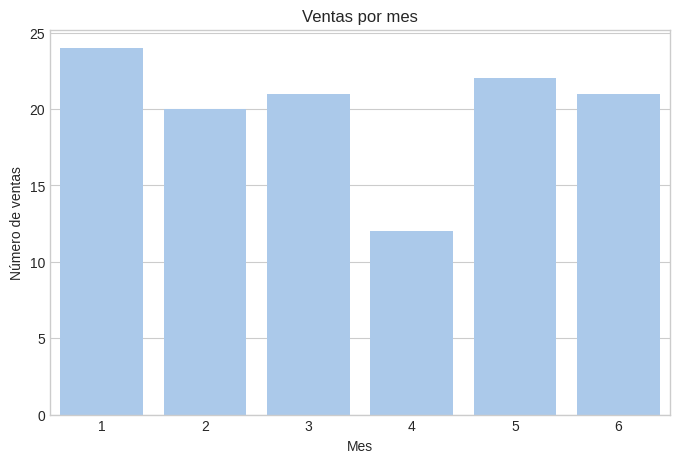

In [7]:
# Ventas por fecha (diario)
ventas_por_fecha = ventas.groupby('fecha').size()
plt.figure(figsize=(10,4))
ventas_por_fecha.plot()
plt.title('Ventas por día')
plt.xlabel('Fecha')
plt.ylabel('Número de ventas')
plt.show()

# Ventas por mes
ventas_por_mes = ventas.groupby('mes_venta').size()
plt.figure(figsize=(8,5))
sns.barplot(x=ventas_por_mes.index, y=ventas_por_mes.values)
plt.title('Ventas por mes')
plt.xlabel('Mes')
plt.ylabel('Número de ventas')
plt.show()

### **Análisis de métodos de pago**


📊 Número de ventas por método de pago:
pago_Efectivo         37
pago_Qr               30
pago_Tarjeta          26
pago_Transferencia    27
dtype: int64


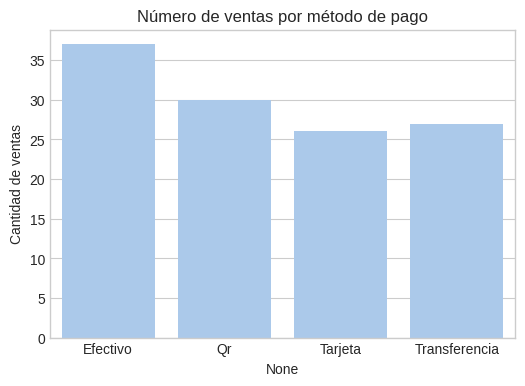

In [8]:
metodos_pago = ['pago_Efectivo', 'pago_Qr', 'pago_Tarjeta', 'pago_Transferencia']
conteo_pago = ventas[metodos_pago].sum()

print("\n📊 Número de ventas por método de pago:")
print(conteo_pago)

# Gráfico de barras de métodos de pago
plt.figure(figsize=(6,4))
sns.barplot(x=conteo_pago.index.str.replace('pago_', ''), y=conteo_pago.values)
plt.title('Número de ventas por método de pago')
plt.ylabel('Cantidad de ventas')
plt.show()

### **Clientes más frecuentes**


Top 10 clientes con más compras:
id_cliente
56     5
72     4
5      4
42     4
49     4
39     4
15     3
52     3
100    3
62     2
Name: count, dtype: int64


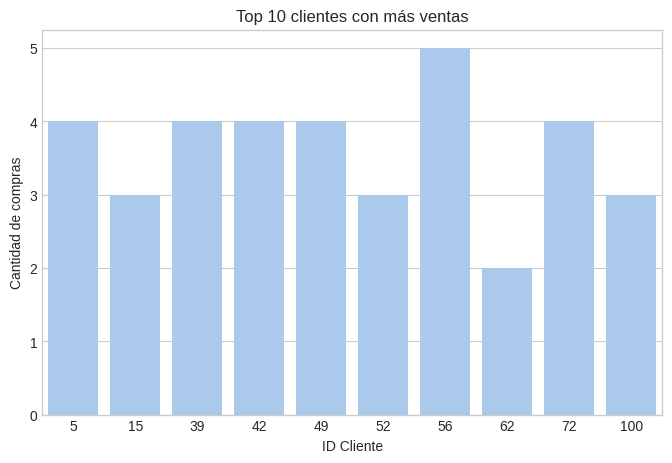

In [9]:
ventas_por_cliente = ventas['id_cliente'].value_counts().head(10)
print("\nTop 10 clientes con más compras:")
print(ventas_por_cliente)

plt.figure(figsize=(8,5))
sns.barplot(x=ventas_por_cliente.index, y=ventas_por_cliente.values)
plt.title('Top 10 clientes con más ventas')
plt.xlabel('ID Cliente')
plt.ylabel('Cantidad de compras')
plt.show()